In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import confusion_matrix, classification_report

# Defining Dataset 

In [9]:
# Define the dataset structure
train_dir = 'train/train_data'
test_dir = 'test/test_data'

# Data Generators

In [10]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    color_mode='grayscale',
    batch_size=32,
    class_mode='binary',
    subset='training'
)
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    color_mode='grayscale',
    batch_size=32,
    class_mode='binary',
    subset='validation'
)
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    color_mode='grayscale',
    batch_size=32,
    class_mode='binary',
    shuffle=False
)


Found 3552 images belonging to 2 classes.
Found 886 images belonging to 2 classes.
Found 1114 images belonging to 2 classes.


# Defining Funtion to create and compile the model

In [11]:
# Define a function to create and compile the model
def create_model(loss):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(), loss=loss, metrics=['accuracy'])
    return model


# Visualisation of the Model

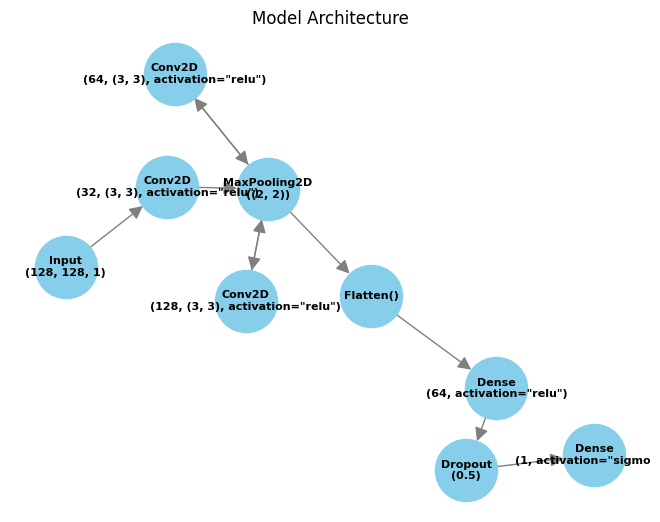

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes for each layer
layers = [
    ('Input\n(128, 128, 1)', 'Conv2D\n(32, (3, 3), activation="relu")'),
    ('Conv2D\n(32, (3, 3), activation="relu")', 'MaxPooling2D\n((2, 2))'),
    ('MaxPooling2D\n((2, 2))', 'Conv2D\n(64, (3, 3), activation="relu")'),
    ('Conv2D\n(64, (3, 3), activation="relu")', 'MaxPooling2D\n((2, 2))'),
    ('MaxPooling2D\n((2, 2))', 'Conv2D\n(128, (3, 3), activation="relu")'),
    ('Conv2D\n(128, (3, 3), activation="relu")', 'MaxPooling2D\n((2, 2))'),
    ('MaxPooling2D\n((2, 2))', 'Flatten()'),
    ('Flatten()', 'Dense\n(64, activation="relu")'),
    ('Dense\n(64, activation="relu")', 'Dropout\n(0.5)'),
    ('Dropout\n(0.5)', 'Dense\n(1, activation="sigmoid")')
]
G.add_edges_from(layers)

# Set node positions
pos = nx.spring_layout(G)

# Draw nodes and edges
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=8, font_weight='bold', arrowsize=20, edge_color='gray')

# Display the plot
plt.title('Model Architecture')
plt.show()






C:\Users\rayha\AppData\Local\Temp\ipykernel_25804\3444062297.py:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


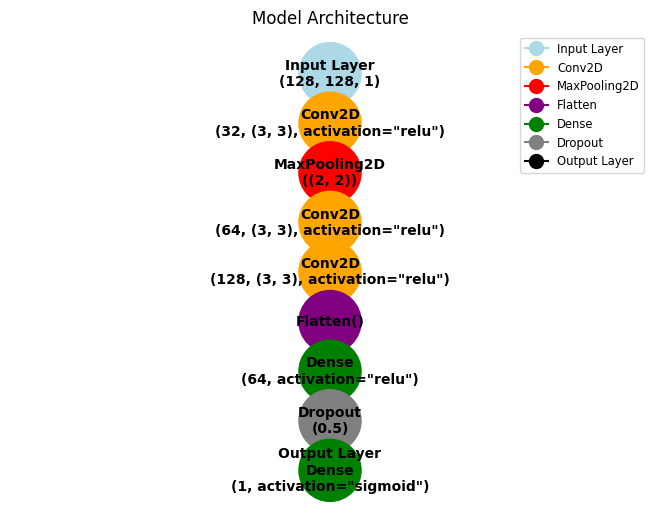

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes for each layer
layers = [
    ('Input Layer\n(128, 128, 1)', 'Conv2D\n(32, (3, 3), activation="relu")'),
    ('Conv2D\n(32, (3, 3), activation="relu")', 'MaxPooling2D\n((2, 2))'),
    ('MaxPooling2D\n((2, 2))', 'Conv2D\n(64, (3, 3), activation="relu")'),
    ('Conv2D\n(64, (3, 3), activation="relu")', 'MaxPooling2D\n((2, 2))'),
    ('MaxPooling2D\n((2, 2))', 'Conv2D\n(128, (3, 3), activation="relu")'),
    ('Conv2D\n(128, (3, 3), activation="relu")', 'MaxPooling2D\n((2, 2))'),
    ('MaxPooling2D\n((2, 2))', 'Flatten()'),
    ('Flatten()', 'Dense\n(64, activation="relu")'),
    ('Dense\n(64, activation="relu")', 'Dropout\n(0.5)'),
    ('Dropout\n(0.5)', 'Output Layer\nDense\n(1, activation="sigmoid")')
]

G.add_edges_from(layers)

# Set node positions manually
pos = {}
for i, node in enumerate(G.nodes()):
    pos[node] = (0, -i)

# Custom node colors for each type of layer
node_colors = []
for node in G.nodes():
    if 'Input' in node:
        node_colors.append('lightblue')
    elif 'Conv2D' in node:
        node_colors.append('orange')
    elif 'MaxPooling2D' in node:
        node_colors.append('red')
    elif 'Flatten' in node:
        node_colors.append('purple')
    elif 'Dense' in node:
        node_colors.append('green')
    elif 'Dropout' in node:
        node_colors.append('gray')
    else:
        node_colors.append('white')

# Draw nodes and edges
nx.draw(G, pos, with_labels=True, node_size=2000, node_color=node_colors, font_size=10, font_weight='bold', arrowsize=20, edge_color='gray', verticalalignment='center', horizontalalignment='center')

# Add a legend
labels = ['Input Layer', 'Conv2D', 'MaxPooling2D', 'Flatten', 'Dense', 'Dropout', 'Output Layer']
colors = ['lightblue', 'orange', 'red', 'purple', 'green', 'gray', 'black']
legend_elements = [plt.Line2D([0], [0], marker='o', color=c, label=l, markersize=10) for l, c in zip(labels, colors)]
plt.legend(handles=legend_elements, loc='upper right', fontsize='small')

# Display the plot
plt.title('Model Architecture')
plt.tight_layout()
plt.show()


# Defining the number of epochs, loss functions and initializing list to store the results

In [12]:
# Define the number of epochs
epochs = 50

# Define a list of loss functions to compare
loss_functions = ['binary_crossentropy', 'hinge', 'mean_squared_error']

# Initialize lists to store results
accuracies = []
losses = []

# Iterating over each loss function and training the model

In [13]:
# Initialize dictionaries to store accuracy for each loss function
test_accuracy_dict = {loss_function: [] for loss_function in loss_functions}

# Initialize dictionaries to store losses and accuracy for each loss function
train_losses_dict = {loss_function: [] for loss_function in loss_functions}
train_accuracy_dict = {loss_function: [] for loss_function in loss_functions}
val_accuracy_dict = {loss_function: [] for loss_function in loss_functions}  # Added dictionary for validation accuracy

# Iterate over each loss function
for loss_function in loss_functions:
    print(f"Training with loss function: {loss_function}")
    # Create and compile the model
    model = create_model(loss_function)
    
    # Callbacks
    early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
    model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True)

    # Training
    history = model.fit(
        train_generator,
        epochs=epochs,
        validation_data=validation_generator,
        callbacks=[early_stopping, model_checkpoint]
    )
    
    # Store training losses and accuracy
    train_losses_dict[loss_function] = history.history['loss']
    train_accuracy_dict[loss_function] = history.history['accuracy']
    val_accuracy_dict[loss_function] = history.history['val_accuracy']  # Store validation accuracy
    
    # Evaluation
    test_loss, test_accuracy = model.evaluate(test_generator)
    test_accuracy_dict[loss_function] = test_accuracy
    print(f'Test accuracy with {loss_function}: {test_accuracy:.4f}')

Training with loss function: binary_crossentropy
Epoch 1/50


C:\Users\altaa\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


111/111 ━━━━━━━━━━━━━━━━━━━━ 29s 245ms/step - accuracy: 0.4839 - loss: 0.7008 - val_accuracy: 0.5000 - val_loss: 0.6894
Epoch 2/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 19s 167ms/step - accuracy: 0.5569 - loss: 0.6860 - val_accuracy: 0.6501 - val_loss: 0.6293
Epoch 3/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 18s 165ms/step - accuracy: 0.6366 - loss: 0.6450 - val_accuracy: 0.6749 - val_loss: 0.6121
Epoch 4/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 19s 167ms/step - accuracy: 0.6511 - loss: 0.6168 - val_accuracy: 0.6907 - val_loss: 0.5952
Epoch 5/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 19s 169ms/step - accuracy: 0.6777 - loss: 0.6030 - val_accuracy: 0.6919 - val_loss: 0.5809
Epoch 6/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 19s 168ms/step - accuracy: 0.6769 - loss: 0.5790 - val_accuracy: 0.6907 - val_loss: 0.5629
Epoch 7/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 18s 165ms/step - accuracy: 0.6949 - loss: 0.5620 - val_accuracy: 0.7009 - val_loss: 0.5659
Epoch 8/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 18s 165ms/step - accuracy: 0.7100 - loss: 0.5479 - val

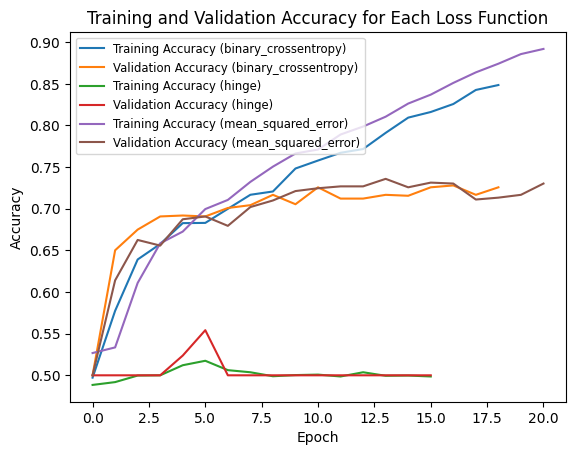

In [14]:
# Plot training and validation accuracy for each loss function
for loss_function in loss_functions:
    plt.plot(train_accuracy_dict[loss_function], label=f'Training Accuracy ({loss_function})')
    plt.plot(val_accuracy_dict[loss_function], label=f'Validation Accuracy ({loss_function})')  # Use stored validation accuracy

plt.title('Training and Validation Accuracy for Each Loss Function')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(fontsize='small')
plt.show()

# Implemented more drop out layers to overcome overfitting using the binary cross entropy loss function and learning rate 0.001

In [ ]:
# Define the model with dropout layers
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.2),  # Add dropout layer
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),  # Add dropout layer
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),  # Add dropout layer
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),  # Add dropout layer
    Dense(1, activation='sigmoid')
])

# Compile the model with the current learning rate
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True)

# Train the model with data augmentation
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=[early_stopping, model_checkpoint],
    verbose=1  # Set verbose to 1 to display training progress
)

Epoch 1/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 14s 112ms/step - accuracy: 0.4787 - loss: 0.7333 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 13s 114ms/step - accuracy: 0.5112 - loss: 0.6938 - val_accuracy: 0.5248 - val_loss: 0.6904
Epoch 3/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 13s 114ms/step - accuracy: 0.5510 - loss: 0.6892 - val_accuracy: 0.5734 - val_loss: 0.6599
Epoch 4/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 13s 113ms/step - accuracy: 0.6259 - loss: 0.6569 - val_accuracy: 0.6704 - val_loss: 0.6233
Epoch 5/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 13s 117ms/step - accuracy: 0.6431 - loss: 0.6303 - val_accuracy: 0.6828 - val_loss: 0.6059
Epoch 6/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 13s 118ms/step - accuracy: 0.6672 - loss: 0.6128 - val_accuracy: 0.6851 - val_loss: 0.5822
Epoch 7/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 13s 117ms/step - accuracy: 0.6838 - loss: 0.5833 - val_accuracy: 0.6862 - val_loss: 0.5728
Epoch 8/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 13s 116ms/step - accuracy: 0.6790 - loss: 0

# Plotting graph for test and validation against accuracy

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.6559 - loss: 0.5519
Test accuracy: 0.7163


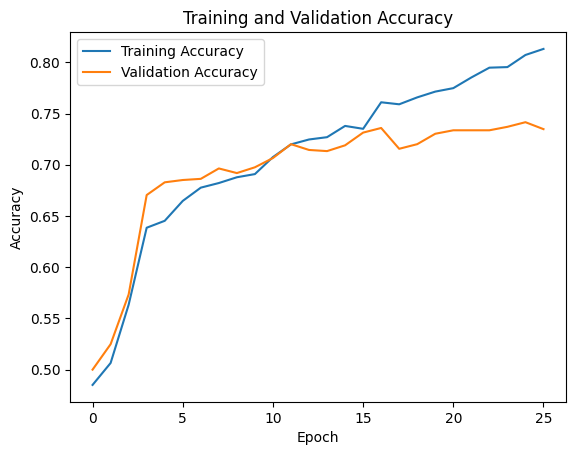

In [ ]:
test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy[1]:.4f}')
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot accuracies for each loss function

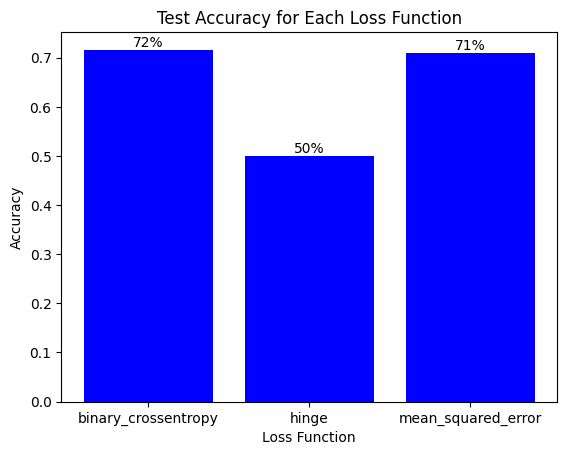

In [ ]:
# Set the positions of the bars on the x-axis
bar_positions = range(len(loss_functions))

plt.bar(bar_positions, test_accuracy_dict.values(), color='blue')

# Set the x-axis tick positions and labels
plt.xticks(bar_positions, loss_functions)

plt.title('Test Accuracy for Each Loss Function')
plt.xlabel('Loss Function')
plt.ylabel('Accuracy')

# Add percentages on top of each bar
for i, accuracy in enumerate(test_accuracy_dict.values()):
    plt.text(i, accuracy, f'{accuracy:.0%}', ha='center', va='bottom')

plt.show()

# Iterating over each learning rate and training the model

In [ ]:
# Define the range of learning rates to explore
learning_rates = [0.001, 0.01, 0.1]

# Initialize lists to store results
accuracies = []
losses = []

# Iterate over each learning rate
for lr in learning_rates:
    print(f"Training with learning rate: {lr}")
    # Define the model
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    
    # Compile the model with the current learning rate
    optimizer = Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    # Callbacks
    early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
    model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True)

    # Train the model
    history = model.fit(
        train_generator,
        epochs=50,
        validation_data=validation_generator,
        callbacks=[early_stopping,model_checkpoint],
        verbose=0  # Set verbose to 0 to suppress training output
    )
    
    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(test_generator)
    accuracies.append(test_accuracy)
    losses.append(test_loss)
    print(f'Test accuracy with learning rate {lr}: {test_accuracy:.4f}')

Training with learning rate: 0.001
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7142 - loss: 0.4871
Test accuracy with learning rate 0.001: 0.7289
Training with learning rate: 0.01
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8281 - loss: 0.6931
Test accuracy with learning rate 0.01: 0.5000
Training with learning rate: 0.1
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.1719 - loss: 0.6943
Test accuracy with learning rate 0.1: 0.5000


# Plot how learning rate affects accuracy

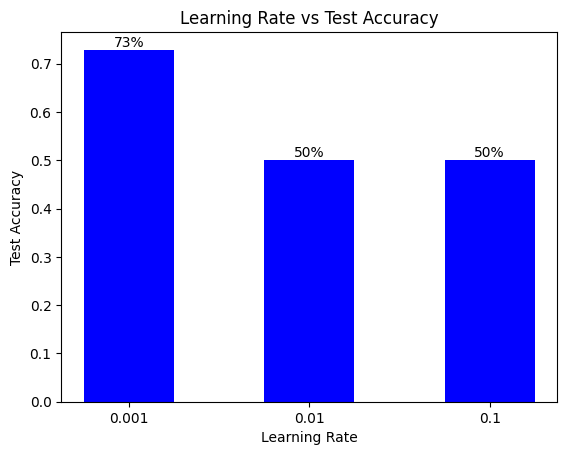

In [ ]:
# Set the width of the bars
bar_width = 0.5

# Set the positions of the bars on the x-axis
bar_positions = range(len(learning_rates))

plt.bar(bar_positions, accuracies, color='blue', width=bar_width)

# Set the x-axis tick positions and labels
plt.xticks(bar_positions, learning_rates)

plt.title('Learning Rate vs Test Accuracy')
plt.xlabel('Learning Rate')
plt.ylabel('Test Accuracy')

# Add percentages on top of each bar
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy, f'{accuracy:.0%}', ha='center', va='bottom')

plt.show()

# Running a model with the binary crossentropy loss function to get confusion matrix

In [ ]:

# Iterate over each learning rate
# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model with the current learning rate
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True)

# Train the model
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=[early_stopping,model_checkpoint],
    verbose=0  # Set verbose to 0 to suppress training output
)
# Predictions
predictions = (model.predict(test_generator) > 0.5).astype("int32")


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


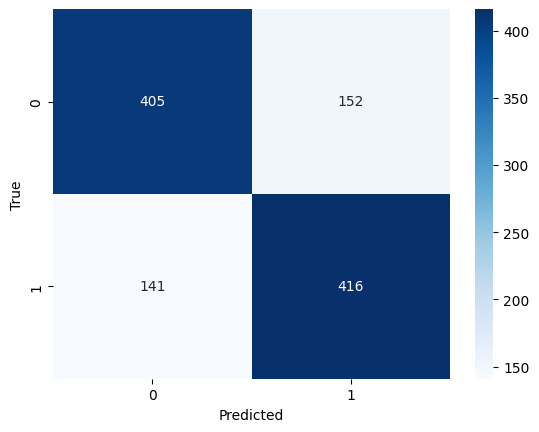

In [ ]:
# Confusion matrix
cm = confusion_matrix(test_generator.classes, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()